# Case Study - What do e-commerce / marketing companies gain by acquiring experimentation & measurement capabilities?

This notebook contain the code used to generate results described in Section 7 of the paper.

In [1]:
from rulu.normal_normal_model import get_samples
import numpy as np
from matplotlib import pyplot as plt

/Users/bryan.liu/.local/share/virtualenvs/ranking_under_lower_uncertainty-NLm1LOk1/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/bryan.liu/.local/share/virtualenvs/ranking_under_lower_uncertainty-NLm1LOk1/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
def get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                              sigma_1, sigma_2, M_list, verbose=False):
    
    sigma_sq_1 = sigma_1 ** 2
    sigma_sq_2 = sigma_2 ** 2
    sigma_sq_X = sigma_X ** 2
    NUM_SAMPLES = 2000
    
    E_Ds = []
    CI_lows = []
    CI_highs = []
    
    print("Parameters: N = {}, mu_X = {}, sigma_X = {}, "
      "mu_epsilon = {}, sigma_1 = {}, sigma_2 = {}"
      .format(N, mu_X, sigma_X, mu_epsilon, sigma_1, sigma_2))

    for M in M_list:
        improvement = (
            get_samples(
                n_samples=NUM_SAMPLES, N=N, M=M, 
                mu_X=mu_X, mu_epsilon=mu_epsilon, 
                sigma_sq_X=sigma_sq_X, sigma_sq_1=sigma_sq_1,
                sigma_sq_2=sigma_sq_2, verbose=False)['improvement']
        )

        E_D = np.mean(improvement)
        CI_low = np.percentile(improvement, 5)
        CI_high = np.percentile(improvement, 95)

        E_Ds.append(E_D)
        CI_lows.append(CI_low)
        CI_highs.append(CI_high)
        
        if verbose:
            print("M = {}, Improvement = {}, CI = [{}, {}]"
                  .format(M, np.round(E_D, 4),
                          np.round(CI_low, 4), np.round(CI_high, 4)))
            
    return E_Ds, CI_lows, CI_highs

def generate_improvement_against_M_plot(M_list, exp_improvements, CI_lows, CI_highs):
    fig, ax = plt.subplots()
    
    ax.errorbar(exp_improvements, M_list, 
                xerr=[np.array(exp_improvements) - np.array(CI_lows), 
                      np.array(CI_highs) - np.array(exp_improvements)],
                fmt='o', capsize=3)
    
    ax.axvline(0, c='black')
    
    # The zero line has to be visible
    ax.set_xlim(min(min(CI_lows)-0.01, -0.01) * 1.05, 
                max(max(CI_highs), 0.01) * 1.05)
    
#     ax.set_xlabel('Value gained')
#     ax.set_ylabel('M')
    
    return fig, ax

# One Figure

Here we consider the case of generating a single figure (i.e. a $\sigma^2_1, \sigma^2_2$ pair). This is to ensure we can generate multiple figures in the experiments described in Section 6 of the paper.

In [5]:
N = 6700
sigma_X = 0.75
mu_X = 0
mu_epsilon = 0

M_list = [10, 20, 50, 100, 200, 500, 1000, 1500, 2000]
sigma_1 = 1.5
sigma_2 = 1

E_Ds, CI_lows, CI_highs = (
    get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                              sigma_1, sigma_2, M_list, verbose=True)
)


Parameters: N = 6700, mu_X = 0, sigma_X = 0.75, mu_epsilon = 0, sigma_1 = 1.5, sigma_2 = 1
M = 10, Improvement = 0.3732, CI = [-0.0971, 0.8285]
M = 20, Improvement = 0.3504, CI = [0.0208, 0.6881]
M = 50, Improvement = 0.3166, CI = [0.1032, 0.5268]
M = 100, Improvement = 0.2877, CI = [0.1373, 0.4367]
M = 200, Improvement = 0.2599, CI = [0.1587, 0.3586]
M = 500, Improvement = 0.217, CI = [0.157, 0.2759]
M = 1000, Improvement = 0.179, CI = [0.1379, 0.2183]
M = 1500, Improvement = 0.1539, CI = [0.1248, 0.1831]
M = 2000, Improvement = 0.1332, CI = [0.1088, 0.1575]


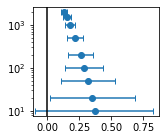

In [8]:
fig, ax = generate_improvement_against_M_plot(
    M_list, E_Ds, CI_lows, CI_highs)

ax.set_yscale('log')
fig.set_size_inches(2.25, 2)

fig

# Potential value gained for e-commerce companies

Here we treat the 6700 e-commerce experiments reported by Browne and Johnson as if that they are run by the same organisation, how much value would such organisation gain if the measurement/estimation noise is reduced from $\sigma^2_1$ to $\sigma^2_2$?

Parameters: N = 6700, mu_X = 0, sigma_X = 0.6, mu_epsilon = 0, sigma_1 = 1, sigma_2 = 0.8
M = 10, Improvement = 0.1701, CI = [-0.2126, 0.5089]
M = 20, Improvement = 0.1596, CI = [-0.0912, 0.4203]
M = 50, Improvement = 0.1436, CI = [-0.0223, 0.3075]
M = 100, Improvement = 0.1313, CI = [0.0229, 0.2475]
M = 200, Improvement = 0.1143, CI = [0.04, 0.1923]
M = 500, Improvement = 0.0976, CI = [0.051, 0.143]
M = 1000, Improvement = 0.079, CI = [0.0485, 0.1095]
M = 2000, Improvement = 0.059, CI = [0.0405, 0.0776]
Parameters: N = 6700, mu_X = 0, sigma_X = 0.6, mu_epsilon = 0, sigma_1 = 1, sigma_2 = 0.6
M = 10, Improvement = 0.3808, CI = [0.0404, 0.7356]
M = 20, Improvement = 0.3549, CI = [0.1131, 0.6045]
M = 50, Improvement = 0.3193, CI = [0.1699, 0.4718]
M = 100, Improvement = 0.2908, CI = [0.1865, 0.3932]
M = 200, Improvement = 0.2618, CI = [0.1889, 0.3318]
M = 500, Improvement = 0.2179, CI = [0.1739, 0.2611]
M = 1000, Improvement = 0.1803, CI = [0.1516, 0.2086]
M = 2000, Improvement = 0.1337,

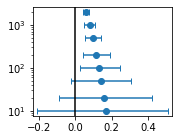

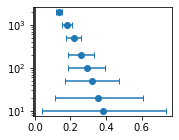

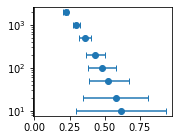

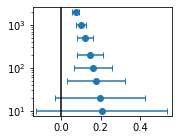

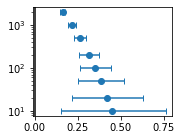

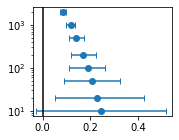

In [9]:
M_list = [10, 20, 50, 100, 200, 500, 1000, 2000]
N = 6700
sigma_X = 0.6
mu_X = 0
mu_epsilon = 0

for sigma_1 in [1, 0.8, 0.6]:
    for sigma_2 in [0.8, 0.6, 0.4]:
        if sigma_1 > sigma_2:
            E_Ds, CI_lows, CI_highs = (
                get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                                          sigma_1, sigma_2, M_list, verbose=True)
            )
            
            fig, ax = generate_improvement_against_M_plot(
                M_list, E_Ds, CI_lows, CI_highs)

            ax.set_yscale('log')
            fig.set_size_inches(2.5, 2)
            fig.savefig("./output/fig/value_gained_browne_johnson_{}_{}.pdf"
                        .format(str(sigma_1).replace('.', '-'),
                                str(sigma_2).replace('.', '-')),
                        transparent=True, bbox_inches='tight')

# Potential value gained for marketing companies

Here we treat the 184 e-commerce experiments reported by Johnson et al. as if that they are run by the same organisation, how much value would such organisation gain if the measurement/estimation noise is reduced from $\sigma^2_1$ to $\sigma^2_2$?

Parameters: N = 184, mu_X = 19.9, sigma_X = 10, mu_epsilon = 0, sigma_1 = 5, sigma_2 = 0.8
M = 10, Improvement = 2.069, CI = [0.6274, 3.7586]
M = 20, Improvement = 1.7409, CI = [0.7926, 2.852]
M = 30, Improvement = 1.5419, CI = [0.7686, 2.3995]
M = 40, Improvement = 1.3685, CI = [0.7586, 2.0533]
M = 50, Improvement = 1.2531, CI = [0.7333, 1.8687]
M = 60, Improvement = 1.1177, CI = [0.658, 1.6374]
M = 80, Improvement = 0.9236, CI = [0.5825, 1.3124]
M = 100, Improvement = 0.7447, CI = [0.4671, 1.0504]
Parameters: N = 184, mu_X = 19.9, sigma_X = 10, mu_epsilon = 0, sigma_1 = 5, sigma_2 = 0.6
M = 10, Improvement = 2.0567, CI = [0.6246, 3.826]
M = 20, Improvement = 1.7706, CI = [0.7861, 2.8813]
M = 30, Improvement = 1.5404, CI = [0.7921, 2.3858]
M = 40, Improvement = 1.4033, CI = [0.8171, 2.0954]
M = 50, Improvement = 1.2661, CI = [0.7316, 1.847]
M = 60, Improvement = 1.1448, CI = [0.6861, 1.6501]
M = 80, Improvement = 0.9365, CI = [0.5896, 1.327]
M = 100, Improvement = 0.7562, CI = [0.4589

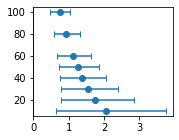

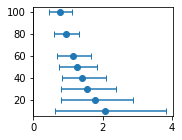

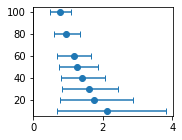

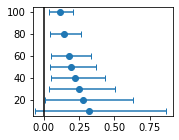

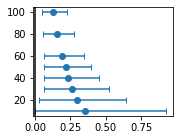

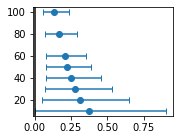

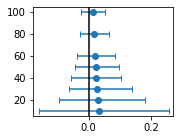

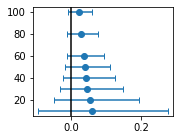

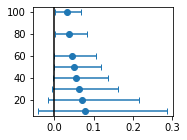

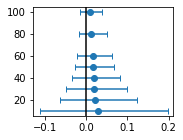

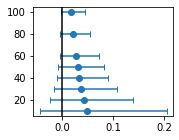

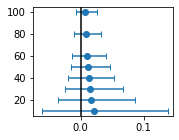

In [10]:
M_list = [10, 20, 30, 40, 50, 60, 80, 100]
N = 184
sigma_X = 10
mu_X = 19.9
mu_epsilon = 0

for sigma_1 in [5, 2, 1, 0.8, 0.6]:
    for sigma_2 in [0.8, 0.6, 0.4]:
        if sigma_1 > sigma_2:
            E_Ds, CI_lows, CI_highs = (
                get_improvement_against_M(N, mu_X, sigma_X, mu_epsilon, 
                                          sigma_1, sigma_2, M_list, verbose=True)
            )
            
            fig, ax = generate_improvement_against_M_plot(
                M_list, E_Ds, CI_lows, CI_highs)
            
            ax.set_yscale('linear')
            fig.set_size_inches(2.5, 2)
            fig.savefig("./output/fig/value_gained_johnson_etal_{}_{}.pdf"
                        .format(str(sigma_1).replace('.', '-'),
                                str(sigma_2).replace('.', '-')),
                        transparent=True, bbox_inches='tight')